In [13]:
from causallearn.search.ScoreBased.GES import ges
import numpy as np
import pandas as pd

In [14]:
df = pd.read_csv("sample_data\LSM-15Year.txt", sep="\t")
df.head()

,race ethnicity,smoking,alcohol_useage,family_history,age_at_diagnosis,menopause_status,side,TNEG,ER,ER_percent,...,size,grade,invasive,histology2,invasive_tumor_Location,DCIS_level,re_excision,surgical_margins,MRIs_60_surgery,distant_recurrence
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
0,0,0,1,0,1,0,0,0,0,0,...,0,1,0,0,1,1,0,0,0,1
0,0,0,2,1,0,1,1,0,0,0,...,1,2,0,0,0,2,1,0,0,1
1,0,1,1,0,2,0,1,0,0,0,...,0,1,0,1,2,3,0,0,0,1
1,0,0,2,2,1,0,0,0,0,0,...,0,1,0,0,0,1,0,0,1,1


In [16]:
X = df.to_numpy()
Record = ges(X, score_func="local_score_BDeu")

[[ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0 

In [17]:
from causallearn.utils.GraphUtils import GraphUtils
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import pydot
import io

In [18]:
labels = df.columns
labels

Index(['race    ethnicity', 'smoking', 'alcohol_useage', 'family_history',
       'age_at_diagnosis', 'menopause_status', 'side', 'TNEG', 'ER',
       'ER_percent', 'PR', 'PR_percent', 'P53', 'HER2', 't_tnm_stage',
       'n_tnm_stage', 'stage', 'lymph_node_removed', 'lymph_node_positive',
       'lymph_node_status', 'Histology', 'size', 'grade', 'invasive',
       'histology2', 'invasive_tumor_Location', 'DCIS_level', 're_excision',
       'surgical_margins', 'MRIs_60_surgery', 'distant_recurrence'],
      dtype='object')

In [19]:
plt.rcParams['figure.dpi'] = 300

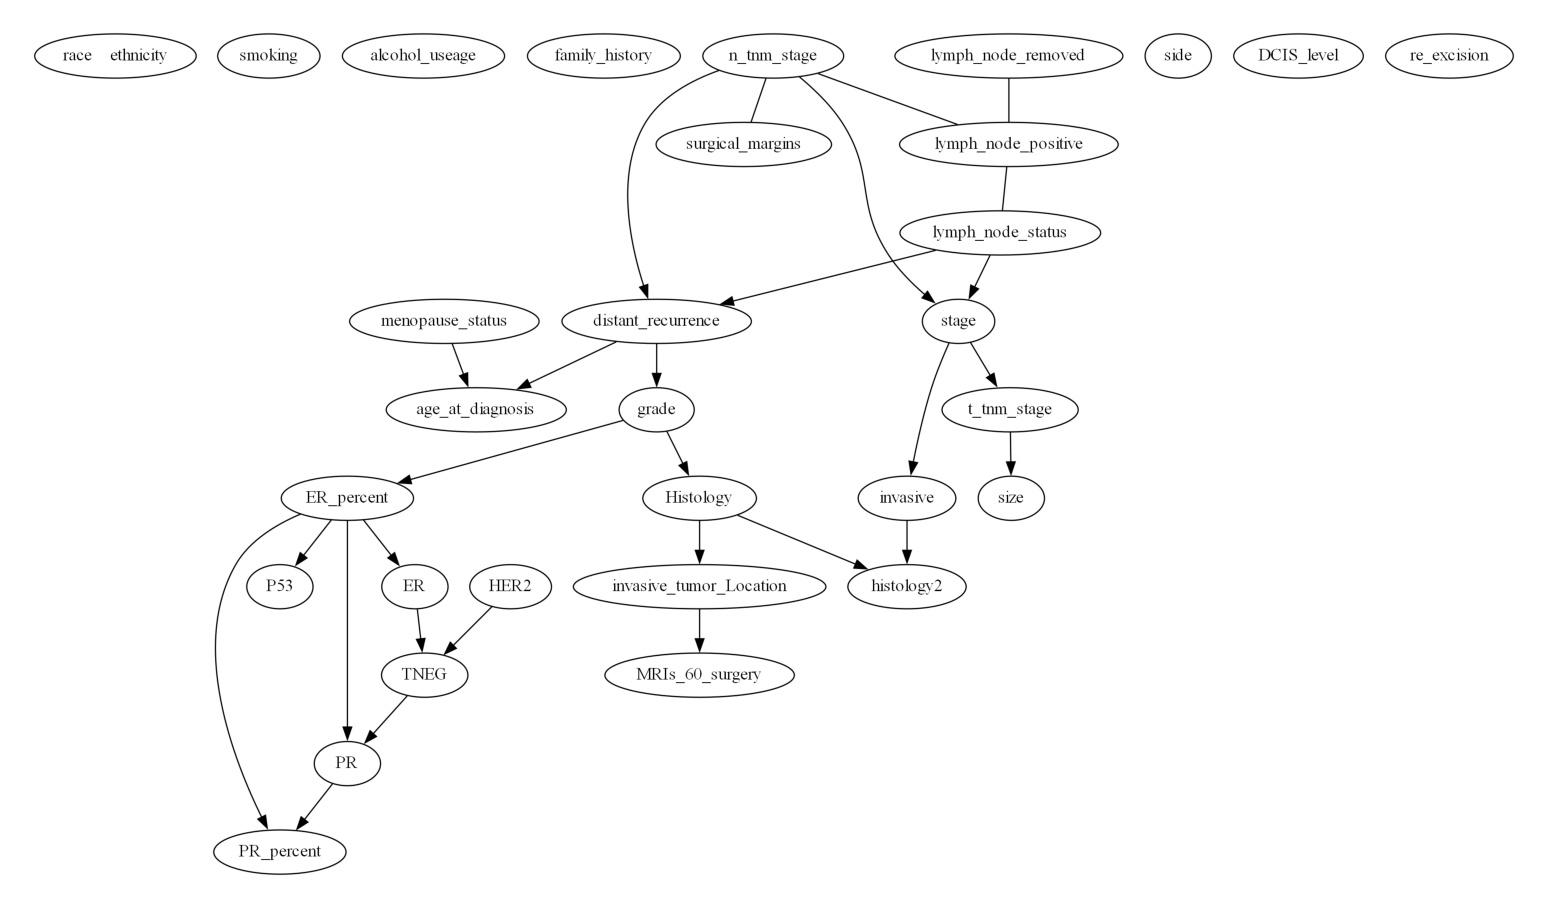

In [20]:
pyd = GraphUtils.to_pydot(Record['G'], labels=labels)
tmp_png = pyd.create_png(f="png")
fp = io.BytesIO(tmp_png)
img = mpimg.imread(fp, format='png')
plt.axis('off')
plt.imshow(img)
plt.show()